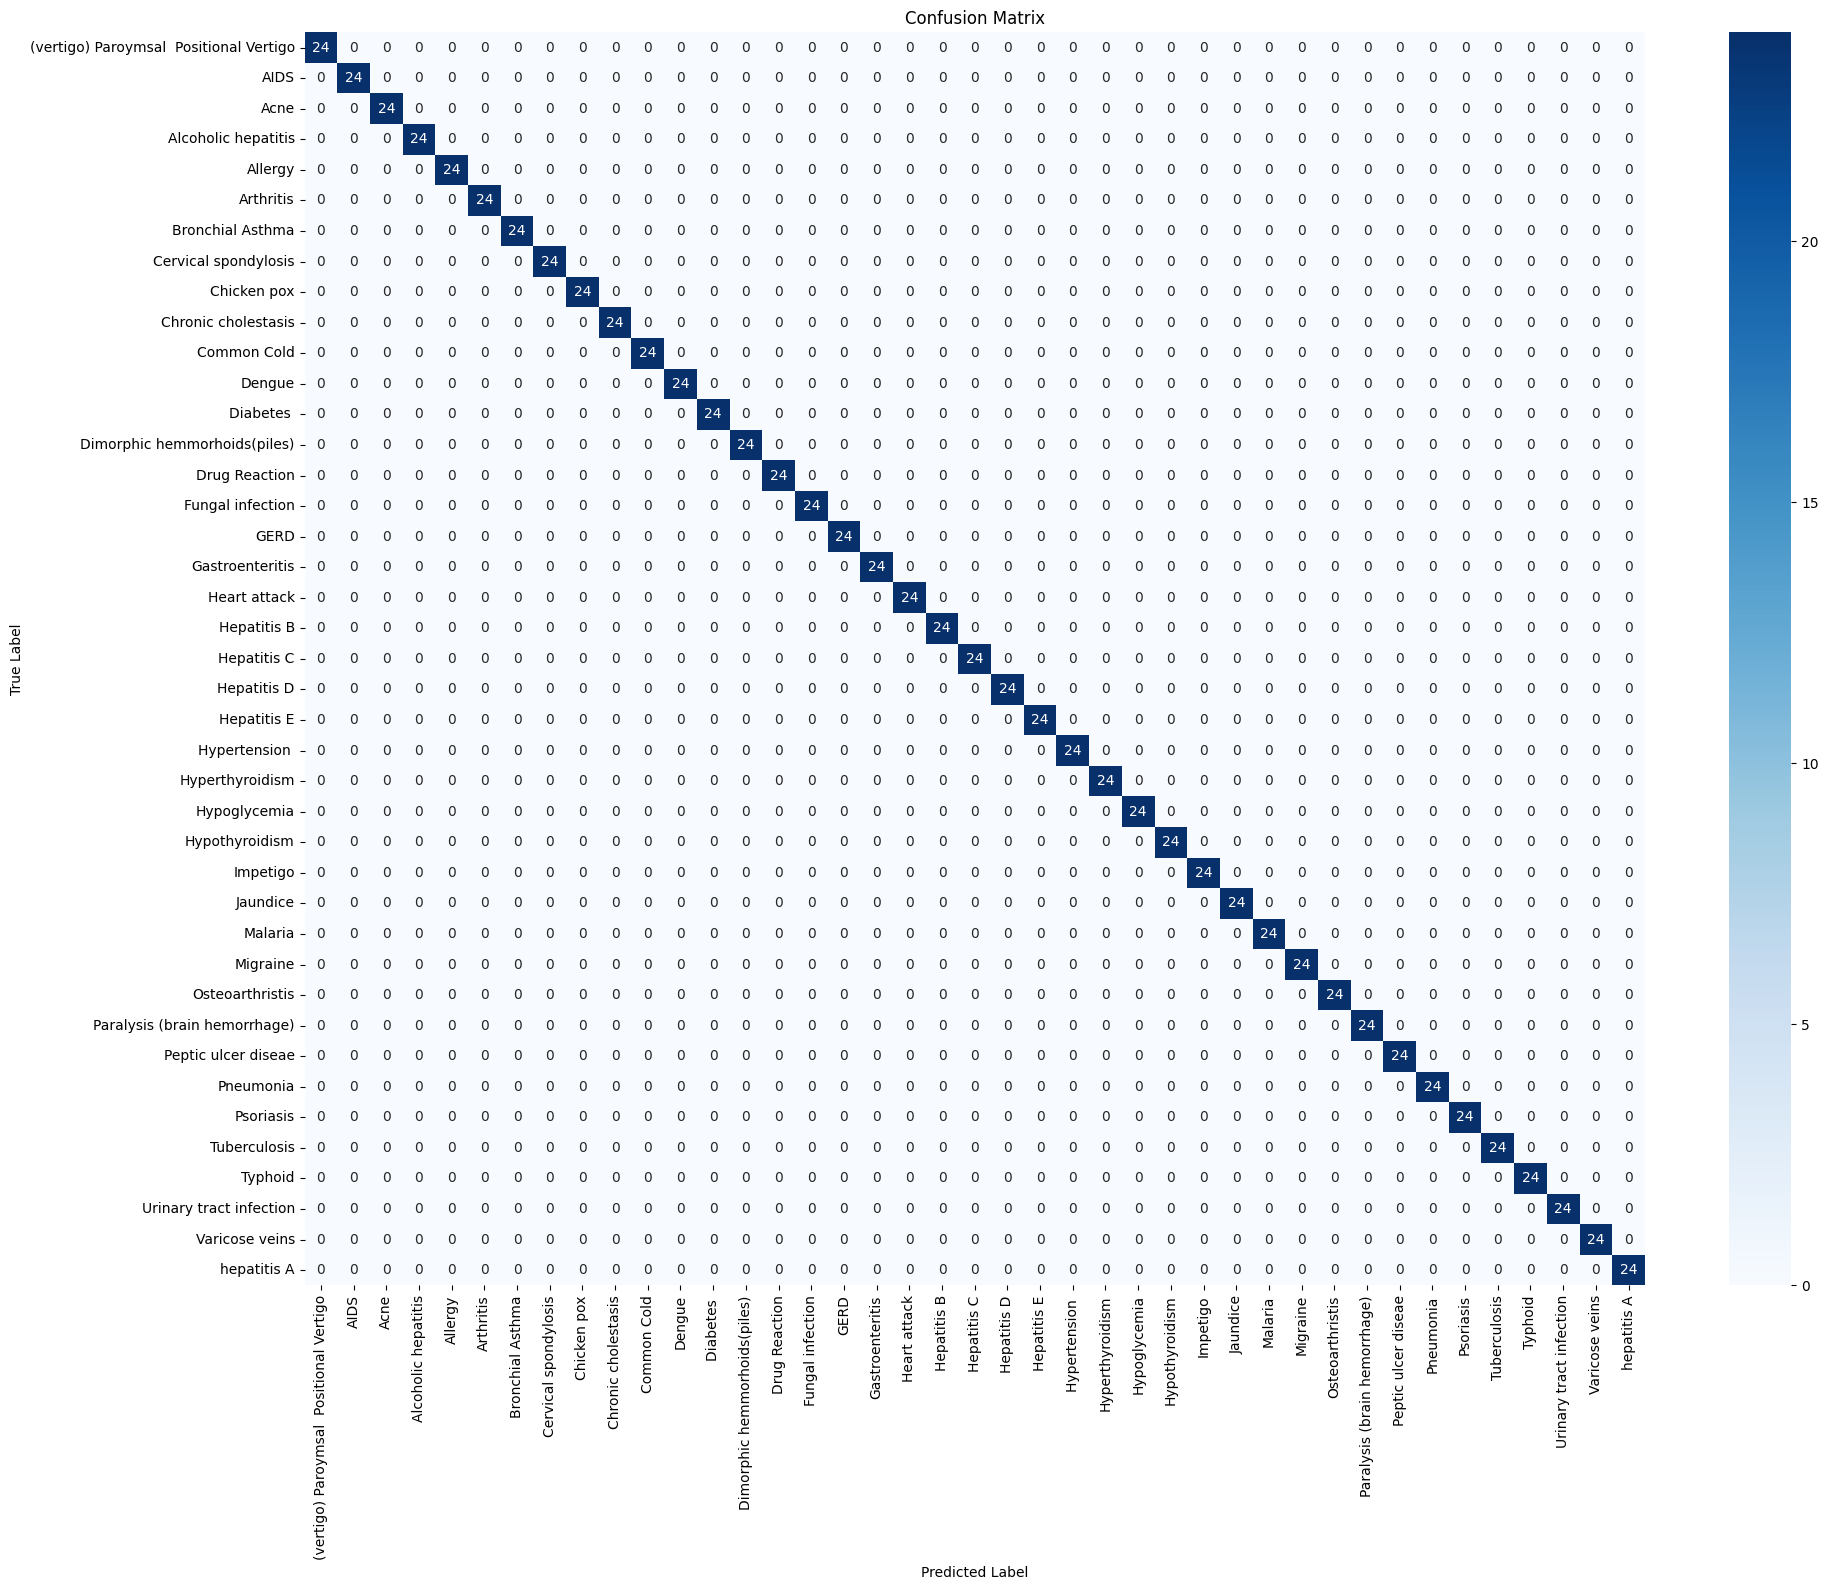

Per-Class Performance:
                                         precision  recall  f1-score  support
(vertigo) Paroymsal  Positional Vertigo        1.0     1.0       1.0     24.0
AIDS                                           1.0     1.0       1.0     24.0
Acne                                           1.0     1.0       1.0     24.0
Alcoholic hepatitis                            1.0     1.0       1.0     24.0
Allergy                                        1.0     1.0       1.0     24.0
Arthritis                                      1.0     1.0       1.0     24.0
Bronchial Asthma                               1.0     1.0       1.0     24.0
Cervical spondylosis                           1.0     1.0       1.0     24.0
Chicken pox                                    1.0     1.0       1.0     24.0
Chronic cholestasis                            1.0     1.0       1.0     24.0
Common Cold                                    1.0     1.0       1.0     24.0
Dengue                                   

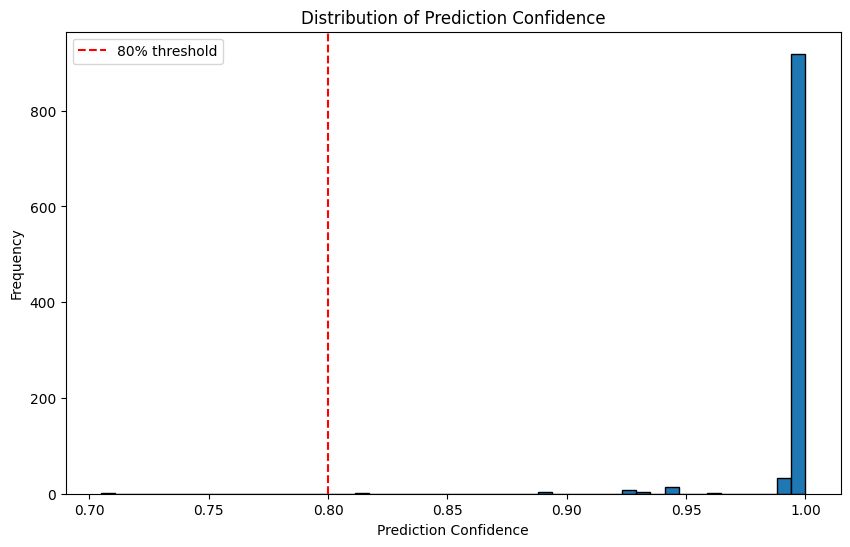


Predictions with >80% confidence: 982/984
Percentage: 99.80%


In [3]:
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load model and data
model = joblib.load('../models/best_model_Naive_Bayes.pkl')
X_test = np.load('../data/processed/X_test.npy')  # You'll need to save this
y_test = np.load('../data/processed/y_test.npy')

# Load label encoder
vocab_data = joblib.load('../data/processed/vocabulary.pkl')
label_encoder = vocab_data['label_encoder']

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../models/confusion_matrix.png', dpi=300)
plt.show()

# Per-class accuracy
print("Per-Class Performance:")
print("="*60)
report = classification_report(y_test, y_pred, 
                               target_names=label_encoder.classes_,
                               output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

# Find problematic diseases (low accuracy)
class_accuracies = report_df['f1-score'][:-3]  # Exclude avg rows
low_accuracy_diseases = class_accuracies[class_accuracies < 0.7].sort_values()

if len(low_accuracy_diseases) > 0:
    print("\n⚠️ Diseases with low prediction accuracy:")
    print(low_accuracy_diseases)
else:
    print("\n✓ All diseases have good prediction accuracy!")

# Analyze prediction confidence
max_probas = np.max(y_pred_proba, axis=1)
plt.figure(figsize=(10, 6))
plt.hist(max_probas, bins=50, edgecolor='black')
plt.xlabel('Prediction Confidence')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Confidence')
plt.axvline(x=0.8, color='r', linestyle='--', label='80% threshold')
plt.legend()
plt.savefig('../models/confidence_distribution.png')
plt.show()

print(f"\nPredictions with >80% confidence: {(max_probas > 0.8).sum()}/{len(max_probas)}")
print(f"Percentage: {(max_probas > 0.8).sum()/len(max_probas)*100:.2f}%")